# Importing Dependecies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("user-interactions.csv",index_col=[0],parse_dates=["updated_at"],squeeze=True)

In [3]:
df.head()

,user_id,pratilipi_id,read_percent,updated_at
0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227
1,5506791979071996,1377786219742624,29.0,2022-03-23 00:08:26.220
2,5506791980256358,1377786217096334,22.0,2022-03-23 00:08:26.020
3,5506791988747277,1377786224767880,100.0,2022-03-23 00:08:25.306
4,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250


# Data engineering

In [4]:
print("Number of user_id:",df["user_id"].nunique())
print("Number of pratilipi_id:",df["pratilipi_id"].nunique())
print("Number of read_percent:",df["read_percent"].nunique())

Number of user_id: 355988
Number of pratilipi_id: 373138
Number of read_percent: 24772


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000000 entries, 0 to 9999999
Data columns (total 4 columns):
 #   Column        Dtype         
---  ------        -----         
 0   user_id       int64         
 1   pratilipi_id  int64         
 2   read_percent  float64       
 3   updated_at    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 381.5 MB


In [6]:
df.shape

(10000000, 4)

In [7]:
df.isnull().sum()

user_id         0
pratilipi_id    0
read_percent    0
updated_at      0
dtype: int64

In [8]:
df.describe()

,user_id,pratilipi_id,read_percent
count,1.000000e+07,1.000000e+07,1.000000e+07
mean,5.489158e+15,1.369415e+15,9.325429e+01
std,1.605679e+14,1.221880e+14,2.163297e+01
min,3.255388e+15,-5.375941e+15,0.000000e+00
25%,5.506792e+15,1.377786e+15,1.000000e+02
50%,5.506792e+15,1.377786e+15,1.000000e+02
75%,5.506792e+15,1.377786e+15,1.000000e+02
max,5.506792e+15,1.377786e+15,2.400000e+03


In [9]:
average_user = df.groupby('updated_at').mean()['read_percent']
average_user.head()

updated_at
2022-03-18 15:14:41.771    100.0
2022-03-18 15:14:41.777    100.0
2022-03-18 15:14:41.827    100.0
2022-03-18 15:14:41.924    100.0
2022-03-18 15:14:41.973     38.0
Name: read_percent, dtype: float64

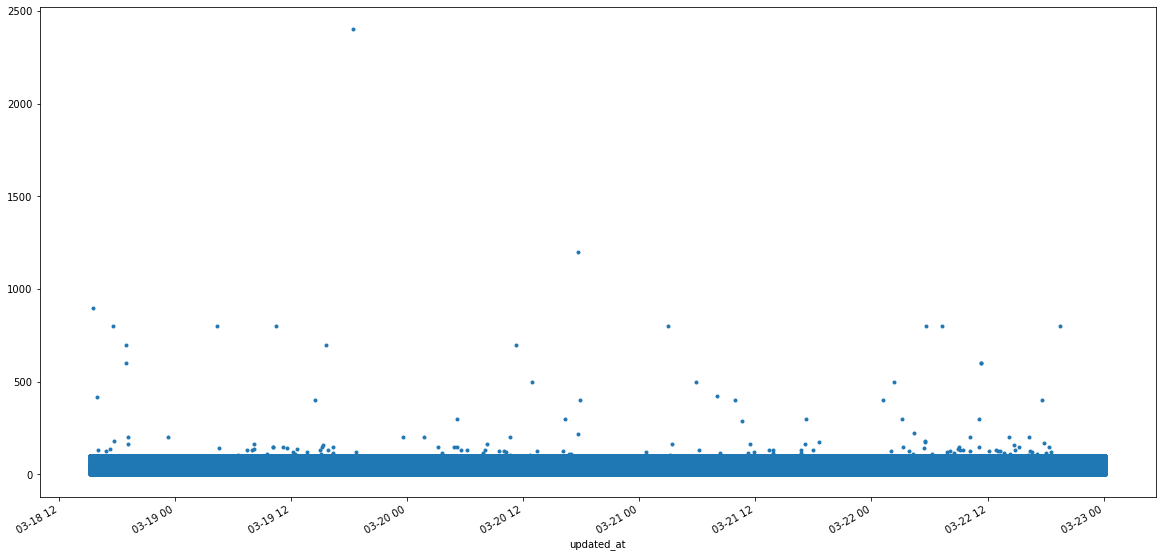

In [10]:
average_user.plot(style='.', figsize=(20,10));

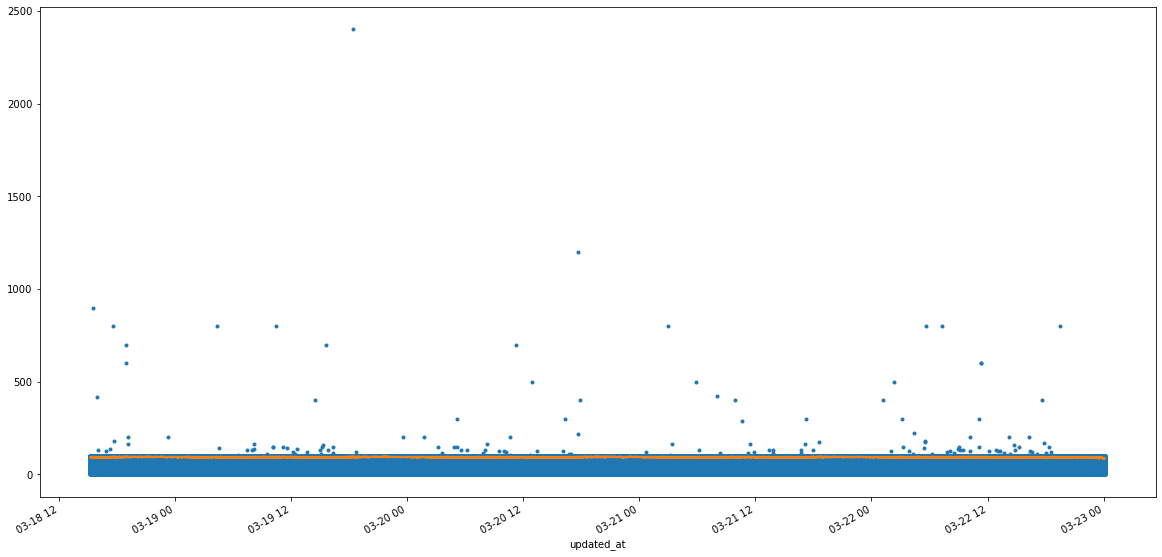

In [11]:
moving_avg = average_user.rolling(window=365, center=True, min_periods=180).mean()
average_user.plot(style='.', figsize=(20,10));
moving_avg.plot();

### Top pratilipies to be read by users later

In [12]:
freq_user=df.groupby("pratilipi_id")["read_percent"].max()
freq_user.sort_values(ascending=False)

pratilipi_id
1377786216901040    2400.0
1377786220451281    1200.0
1377786216907065     900.0
1377786219588613     700.0
1377786216692750     600.0
                     ...  
1377786228285370       0.0
1377786228285451       0.0
1377786228285505       0.0
1377786228285906       0.0
1377786228369138       0.0
Name: read_percent, Length: 373138, dtype: float64

######  Top pratilipi_ids(5) to be read later by users
pratilipi_id
1377786216901040    2400.0
1377786220451281    1200.0
1377786216907065     900.0
1377786219588613     700.0
1377786216692750     600.0

In [13]:
df=df.set_index(["updated_at"]) # Changing upadted_at as index
df.head()

,user_id,pratilipi_id,read_percent
updated_at,,,
2022-03-23 00:08:26.227,5506791963854965,1377786220672965,100.0
2022-03-23 00:08:26.220,5506791979071996,1377786219742624,29.0
2022-03-23 00:08:26.020,5506791980256358,1377786217096334,22.0
2022-03-23 00:08:25.306,5506791988747277,1377786224767880,100.0
2022-03-23 00:08:25.250,5506791992372558,1377786218111595,100.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000000 entries, 2022-03-23 00:08:26.227000 to 2022-03-18 15:14:41.771000
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_id       int64  
 1   pratilipi_id  int64  
 2   read_percent  float64
dtypes: float64(1), int64(2)
memory usage: 305.2 MB


In [15]:
df["read_percent"]=df["read_percent"].astype("int")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000000 entries, 2022-03-23 00:08:26.227000 to 2022-03-18 15:14:41.771000
Data columns (total 3 columns):
 #   Column        Dtype
---  ------        -----
 0   user_id       int64
 1   pratilipi_id  int64
 2   read_percent  int32
dtypes: int32(1), int64(2)
memory usage: 267.0 MB


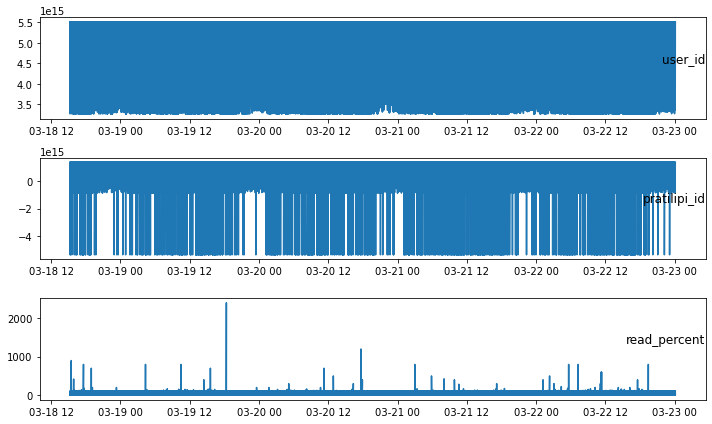

In [17]:
no_cols = len(df.columns)

index = 1

plt.figure(figsize=(10,6))
for column in df.columns:
    plt.subplot(no_cols,1,index)
    plt.plot(df[column])
    plt.title(column , loc="right",y=0.5)
    index+=1
    plt.tight_layout()
plt.show()

# Scaling the Data

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_transformed = scaler.fit_transform(df)
print(df_transformed)

[[0.99999999 1.         0.04166667]
 [0.99999999 1.         0.01208333]
 [0.99999999 1.         0.00916667]
 ...
 [0.99999998 1.         0.04166667]
 [0.99999998 1.         0.04166667]
 [0.99999999 1.         0.04166667]]


# Spliting The Data

In [19]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df_transformed,test_size=0.25,shuffle=False)

# Modeling

In [20]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 3
n_features=3

generatorTrain = TimeseriesGenerator(train,train,length=n_input,batch_size=1)
generatorTest = TimeseriesGenerator(test,test,length=n_input,batch_size=1)

In [21]:
batch_0 = generatorTrain[0]
x,y = batch_0


print(x,y)

[[[0.99999999 1.         0.04166667]
  [0.99999999 1.         0.01208333]
  [0.99999999 1.         0.00916667]]] [[1.         1.         0.04166667]]


In [24]:
import keras
from keras.layers import Dense
from keras.models import Sequential

from keras.optimizers import gradient_descent_v2
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [ ]:
n_epochs=5


model = Sequential()
model.add(LSTM(32,activation="relu", input_shape=(n_input,n_features)))
model.add(Dropout(0.3))

model.add(Dense(n_features))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(generatorTrain, epochs=n_epochs, batch_size=128, shuffle=False)

Epoch 1/5
 449441/7499997 [>.............................] - ETA: 4:47:04 - loss: 0.0023

# Prediction

In [ ]:
predictions = []

first_batch = train[-n_input:]
current_batch = first_batch.reshape((1, n_input, n_features))
for i in range(len(test)):
    
    
    current_pred = model.predict(current_batch)[0]
    predictions.append(current_pred)
    current_batch_rmv_first = current_batch[:,1:,:]
    current_batch = np.append(current_batch_rmv_first,[[current_pred]],axis=1)
    break

In [ ]:
predictions_actual_scale = scaler.inverse_transform(predictions)
test_data_actual_scale = scaler.inverse_transform(test)

plt.plot(predictions_actual_scale[:,0])
plt.plot(test_data_actual_scale[:,0])